In [1]:
import numpy as np
import pandas as pd

# House Price Prediction ML Pipeline

This notebook implements a complete machine learning pipeline for predicting house prices in Bengaluru, including data preprocessing, model training, evaluation, and visualization.

In [19]:
data=pd.read_csv('final_data.csv')
data.head()

,Unnamed: 0,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK,HALL_KITCHEN,location_new,availability_days
0,0,Super built-up Area,Ready To Move,1st Block Koramangala,LuncyRe,1800.0,3.0,2.0,53.0,3,BHK,other,0
1,1,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,2825.0,4.0,3.0,250.0,4,BHK,1st Phase JP Nagar,0
2,2,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,1875.0,3.0,1.0,167.0,3,BHK,1st Phase JP Nagar,0
3,3,Super built-up Area,Ready To Move,1st Phase JP Nagar,NCaveun,1394.0,2.0,1.0,100.0,2,BHK,1st Phase JP Nagar,0
4,4,Super built-up Area,18-May,1st Phase JP Nagar,Inntsth,1077.0,2.0,2.0,93.0,2,BHK,1st Phase JP Nagar,138


In [20]:
# Data Exploration
print("Dataset shape:", data.shape)
print("\nData types:")
print(data.dtypes)
print("\nSummary statistics:")
print(data.describe())
print("\nMissing values:")
print(data.isnull().sum())

Dataset shape: (4075, 13)

Data types:
Unnamed: 0             int64
area_type             object
availability          object
location              object
society               object
total_sqft           float64
bath                 float64
balcony              float64
price                float64
BHK                    int64
HALL_KITCHEN          object
location_new          object
availability_days      int64
dtype: object

Summary statistics:
        Unnamed: 0    total_sqft         bath      balcony        price  \
count  4075.000000   4075.000000  4075.000000  4075.000000  4075.000000   
mean   2548.714847   1409.222367     2.333252     1.591902    86.823785   
std    1498.901803    598.269575     0.752584     0.752403    73.205683   
min       0.000000    350.000000     1.000000     0.000000    10.000000   
25%    1206.500000   1100.000000     2.000000     1.000000    50.000000   
50%    2537.000000   1270.000000     2.000000     2.000000    70.000000   
75%    3799.500000   160

In [ ]:
data.drop(['availability_days','availability','location','Unnamed: 0'],axis=1,inplace=True)
data.head()

,area_type,society,total_sqft,bath,balcony,price,BHK,HALL_KITCHEN,location_new,availability_days
0,Super built-up Area,LuncyRe,1800.0,3.0,2.0,53.0,3,BHK,other,0
1,Super built-up Area,Prhtsok,2825.0,4.0,3.0,250.0,4,BHK,1st Phase JP Nagar,0
2,Super built-up Area,Prhtsok,1875.0,3.0,1.0,167.0,3,BHK,1st Phase JP Nagar,0
3,Super built-up Area,NCaveun,1394.0,2.0,1.0,100.0,2,BHK,1st Phase JP Nagar,0
4,Super built-up Area,Inntsth,1077.0,2.0,2.0,93.0,2,BHK,1st Phase JP Nagar,138


In [4]:
data.area_type.unique()

array(['Super built-up  Area', 'Built-up  Area', 'Carpet  Area',
       'Plot  Area'], dtype=object)

In [5]:
data.columns

Index(['area_type', 'society', 'total_sqft', 'bath', 'balcony', 'price', 'BHK',
       'HALL_KITCHEN', 'location_new', 'availability_days'],
      dtype='object')

In [6]:
new_df=data

In [22]:
def find_category_mappings(new_df, variable):
    return {k: i for i, k in enumerate(new_df[variable].unique())}
def integer_encode(new_df,variable, ordinal_mapping):
    new_df[variable] = new_df[variable].map(ordinal_mapping)
for variable in ['area_type', 'society','HALL_KITCHEN', 'location_new']:
    mappings = find_category_mappings(new_df,variable)
    print(mappings)
    file=open("mapping_"+variable+".txt","w")
    file.write(str(mappings))
    file.close()
    integer_encode(new_df, variable, mappings)
new_df.head()

{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119:

,area_type,society,total_sqft,bath,balcony,price,BHK,HALL_KITCHEN,location_new,availability_days
0,0,0,1800.0,3.0,2.0,53.0,3,0,0,0
1,0,1,2825.0,4.0,3.0,250.0,4,0,1,0
2,0,1,1875.0,3.0,1.0,167.0,3,0,1,0
3,0,2,1394.0,2.0,1.0,100.0,2,0,1,0
4,0,3,1077.0,2.0,2.0,93.0,2,0,1,138


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(new_df.iloc[:, [0,1,2,3,4,6,7,8,9]])
x_scaled = pd.DataFrame(x_scaled, columns=new_df.iloc[:, [0,1,2,3,4,6,7,8,9]].columns)

# Save scaler for later use
from joblib import dump
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [24]:
x = x_scaled
y = new_df.iloc[:, [5]]

In [9]:
x.head()

,area_type,society,total_sqft,bath,balcony,BHK,HALL_KITCHEN,location_new,availability_days
0,0,0,1800.0,3.0,2.0,3,0,0,0
1,0,1,2825.0,4.0,3.0,4,0,1,0
2,0,1,1875.0,3.0,1.0,3,0,1,0
3,0,2,1394.0,2.0,1.0,2,0,1,0
4,0,3,1077.0,2.0,2.0,2,0,1,138


In [10]:
y.head()

,price
0,53.0
1,250.0
2,167.0
3,100.0
4,93.0


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
"""from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 4)  
x_poly= poly_regs.fit_transform(x_train)
x_test_poly=poly_regs.fit_transform(x_test)"""

'from sklearn.preprocessing import PolynomialFeatures  \npoly_regs= PolynomialFeatures(degree= 4)  \nx_poly= poly_regs.fit_transform(x_train)\nx_test_poly=poly_regs.fit_transform(x_test)'

In [26]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, x, y.values.ravel(), cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean()}")
print(f"Std CV R²: {cv_scores.std()}")

Cross-validation R² scores: [0.67100644 0.73743425 0.78961673 0.63793094 0.76993725]
Mean CV R²: 0.7211851207192781
Std CV R²: 0.057918645574405306


In [28]:
y_pred=regressor.predict(x_test)

In [15]:
print(y_pred[26])
print(y_test.iloc[26])

[10.95303798]
price    32.0
Name: 645, dtype: float64


In [16]:
data.iloc[0:1,:]

,area_type,society,total_sqft,bath,balcony,price,BHK,HALL_KITCHEN,location_new,availability_days
0,0,0,1800.0,3.0,2.0,53.0,3,0,0,0


In [17]:
#dat.to_csv("test.csv")

In [31]:
from joblib import dump
dump(regressor, 'model.joblib')

['model.joblib']

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 1552.8128114347855
Mean Absolute Error: 19.172148873268803
R² Score: 0.7482384108251934


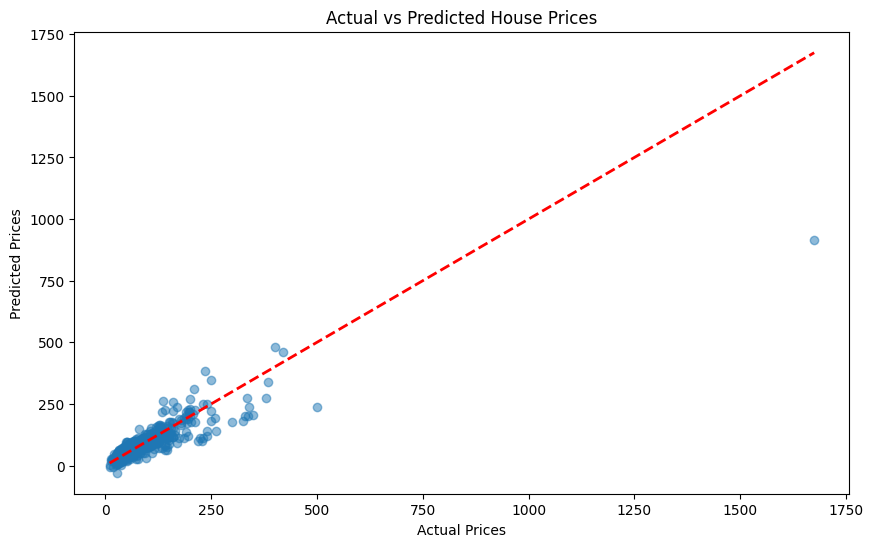

In [30]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()